# Task 1

## Task 1.1

In [2]:
import numpy as np
from CartPole import *
from sklearn import linear_model

In [3]:
    def start_the_cart(initial_values1, initial_values2=None, initial_values3=None, steps=10, remap_angle=False, visual=False, display_plots=True, variable = None):

        cp = CartPole(visual=visual)
        cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values1
        
        

        for step in range(steps):
            if visual: 
                cp.drawPlot()
            cp.performAction()
            if remap_angle: 
                cp.remap_angle()
            inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
            try: 
                x_history = np.vstack((x_history, np.array(inter)))
            except:
                x_history = np.vstack((np.array(initial_values1),np.array(inter)))
        

        
        x_axis=range(len(x_history))
        
        if initial_values2:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values2
        
           

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    y_history = np.vstack((y_history, np.array(inter)))
                except:
                    y_history = np.vstack((np.array(initial_values2),np.array(inter)))
        
        if initial_values3:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values3
        
            

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    z_history = np.vstack((z_history, np.array(inter)))
                except:
                    z_history = np.vstack((np.array(initial_values3),np.array(inter)))
        
        if display_plots:
            fig, axs = plt.subplots(2, 2, figsize=(10, 7))

            axs[0,0].plot(x_axis, [x[0] for x in x_history],label='First')
            if initial_values2: axs[0,0].plot(x_axis, [x[0] for x in y_history],label='Second')
            if initial_values3: axs[0,0].plot(x_axis, [x[0] for x in z_history],label='Third')

            axs[0,1].plot(x_axis, [x[1] for x in x_history])
            if initial_values2: axs[0,1].plot(x_axis, [x[1] for x in y_history])
            if initial_values3: axs[0,1].plot(x_axis, [x[1] for x in z_history])
           
            axs[1,0].plot(x_axis, [x[2] for x in x_history])
            if initial_values2: axs[1,0].plot(x_axis, [x[2] for x in y_history])
            if initial_values3: axs[1,0].plot(x_axis, [x[2] for x in z_history])
            
            axs[1,1].plot(x_axis, [x[3] for x in x_history])
            if initial_values2: axs[1,1].plot(x_axis, [x[3] for x in y_history])
            if initial_values3: axs[1,1].plot(x_axis, [x[3] for x in z_history])
            
            #Set titles
            axs[0,0].set_title('Cart location')
            axs[0,0].set_xlabel('Steps')
            axs[0,0].set_ylabel('x')

            axs[0,1].set_title('Cart velocity')
            axs[0,1].set_xlabel('Steps')
            axs[0,1].set_ylabel('x_dot')


            axs[1,0].set_title('Pole angle')
            axs[1,0].set_xlabel('Steps')
            axs[1,0].set_ylabel('theta')

            axs[1,1].set_title('Pole velocity')
            axs[1,1].set_xlabel('Steps')
            axs[1,1].set_ylabel('theta_dot')

            if variable: fig.suptitle(('Effect of different initial {} on cart dynamics').format(variable),fontsize=16)

            fig.legend()
            fig.tight_layout()
        
        
        return x_history[-1]

### Stable equilibrium

In [4]:
#history = start_the_cart([0,0,np.pi,1],[0,0,np.pi,5],[0,0,np.pi,10],visual=False,remap_angle=False,variable = 'Pole Velocity')


### Complete rotation of pendulum

In [5]:
#history = start_the_cart([0,0,np.pi,15],visual=False,remap_angle=False)

## Task 1.2

In [6]:
initialize = np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
#print(initialize)

In [7]:
variable_number={0:'Cart location',1:'Cart velocity',2:'Pole angle',3:'Pole velocity'}

In [8]:
def one_step(variable, x_axis_range, x_axis_intervals):
    
    
    
    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        y = start_the_cart(x, steps=steps, display_plots=False)

        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
   
    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location


In [9]:
#one_step(0,[-5,5],15)

### Vary cart velocity

In [10]:
#one_step(1,[-10,10],15)

### Vary pole angle

In [11]:
#one_step(2,[-np.pi,np.pi],15)

### Vary pole velocity

In [12]:
#one_step(3,[-15,15],15)

### Creating a variable "y", the difference between x

In [13]:
def one_step_difference(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)
   

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location change')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity change')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle change')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity change')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

    return final_y

In [14]:
def one_step_difference_2(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False,remap_angle=True)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)


    return x_axis, final_y

In [15]:
def together_plot_1_2():
    x_axis1, c_l_real = one_step_difference_2(0,[-5,5],15)
    x_axis2,c_v_real = one_step_difference_2(1,[-10,10],15)
    x_axis3,p_a_real = one_step_difference_2(2,[-np.pi,np.pi],15)
    x_axis4,p_v_real = one_step_difference_2(3,[-15,15],15)

    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='{}'.format(variable_number[i]))
    
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
  

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
     
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
  

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
        
    plt.show()

### (i) Scans of single relationships

In [16]:
#together_plot_1_2()

### (ii) Contour plots

In [17]:
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
axes_ranges = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_of_variables = []
    for index in index_pair:
        range_of_variables.append(axes_ranges[index])
    return range_of_variables

def contours_of_pairs(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = initialize.copy()
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

In [18]:
"""
for indices in different_pairs:
     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))
     contours_of_pairs(indices, axes_for_pairs(indices))
     plt.show()
"""  

"\nfor indices in different_pairs:\n     print('Plots of {} and {}'.format(variable_number[indices[0]],variable_number[indices[1]]))\n     contours_of_pairs(indices, axes_for_pairs(indices))\n     plt.show()\n"

## Task 1.3

In [19]:
def get_xy_pairs(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=True,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [49]:
x,y= get_xy_pairs(500)
get_xy_pairs(5)

(array([[ -4.1398558 ,   1.66083162,   1.75117516, -10.12420276],
        [ -2.83376676,   7.44180233,  -2.40181226,  -3.12844675],
        [ -4.61829202,  -3.9542255 ,  -3.04986162, -14.48938614],
        [ -0.94728987,   3.70980193,  -1.08979061,   0.96186109],
        [  1.02474147,  -2.61851518,   2.26386622,   1.02336792]]),
 array([[ 0.48260906,  1.02218371, -1.49096794,  4.63917802],
        [ 1.42443017, -0.41357027,  5.28934347, -2.32035156],
        [-0.50378364,  2.79922827,  3.89717093,  5.33277846],
        [ 0.76668755,  0.11890486, -0.38624469, -5.69677817],
        [-0.46265225,  0.62550758,  0.70486308,  4.3876079 ]]))

In [21]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]


In [22]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
n=model.predict(test_x)

In [23]:
def predict(train_x, test_x, train_y):
    W = np.matmul(np.linalg.pinv(train_x),train_y)
    prediction = np.matmul(test_x,W)
    return prediction,W
    


In [441]:
m,W = predict(train_x, test_x, train_y)


### First plot. Real and predicted plotted against initial

In [442]:
def vertical_plot(input,next_step,pred_next_step):

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in input],[y[0] for y in next_step],label='Real value')
    axs[0,0].scatter([x[0] for x in input],[y[0] for y in pred_next_step],label='Predicted Value')
    axs[0,0].set_xlabel('Cart location initial value')
    axs[0,0].set_ylabel('Cart location final value')
    axs[0,0].legend()

    axs[0,1].scatter([x[1] for x in input],[y[1] for y in next_step])
    axs[0,1].scatter([x[1] for x in input],[y[1] for y in pred_next_step])
    axs[0,1].set_xlabel('Cart velocity initial value')
    axs[0,1].set_ylabel('Cart velocity final value')

    axs[1,0].scatter([x[2] for x in input],[y[2] for y in next_step])
    axs[1,0].scatter([x[2] for x in input],[y[2] for y in pred_next_step])
    axs[1,0].set_xlabel('Pole angle initial value')
    axs[1,0].set_ylabel('Pole angle final value')

    axs[1,1].scatter([x[3] for x in input],[y[3] for y in next_step])
    axs[1,1].scatter([x[3] for x in input],[y[3] for y in pred_next_step])
    axs[1,1].set_xlabel('Pole velocity initial value')
    axs[1,1].set_ylabel('Pole velocity final value')

    fig.suptitle('Predictions vs Real values after 1 step plotted against various initial values')
    fig.tight_layout()

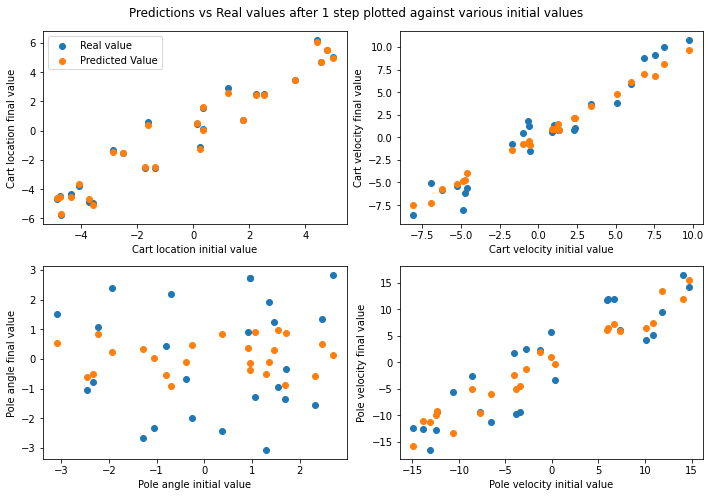

In [443]:
vertical_plot(test_x,test_y+test_x,m+test_x)

In [27]:
def rmse_calc(A,B):
    squared = (A-B)**2
    cl_mse =0
    cv_mse=0
    pa_mse=0
    pv_mse=0
    for row in squared:

        cl_mse+=row[0]
        cv_mse+=row[1]
        pa_mse+=row[2]
        pv_mse+=row[3]
    cl_mse=(cl_mse/len(squared))**0.5
    cv_mse=(cv_mse/len(squared))**0.5
    pa_mse=(pa_mse/len(squared))**0.5
    pv_mse=(pv_mse/len(squared))**0.5


    return cl_mse,cv_mse,pa_mse,pv_mse

In [28]:
rmse_calc(test_y,n)

(0.1218896689712427, 1.4247005021194976, 1.9741641811535695, 3.914248687855925)

In [29]:
rmse_calc(test_y,m)

(0.12326298017103327,
 1.4274718338213315,
 1.9659041002157693,
 3.9197065388950962)

### second plot. This one is real vs predicted only

In [30]:
def real_vs_predicted(real,predicted):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in real],[y[0] for y in predicted])
   
    axs[0,0].set_xlabel('Cart location real value')
    axs[0,0].set_ylabel('Cart location predicted value')
    

    axs[0,1].scatter([x[1] for x in real],[y[1] for y in predicted])
    axs[0,1].set_xlabel('Cart velocity real value')
    axs[0,1].set_ylabel('Cart velocity predicted value')

    axs[1,0].scatter([x[2] for x in real],[y[2] for y in predicted])
    axs[1,0].set_xlabel('Pole angle real value')
    axs[1,0].set_ylabel('Pole angle predicted value')

    axs[1,1].scatter([x[3] for x in real],[y[3] for y in predicted])
    axs[1,1].set_xlabel('Pole velocity real value')
    axs[1,1].set_ylabel('Pole velocity predicted value')

    fig.suptitle('Predictions vs Real values after 1 step')
    fig.tight_layout()

In [31]:
#real_vs_predicted(test_y+test_x,m+test_x)

### Scans with varying parameters

In [339]:
def one_step_difference_with_predictions_2(variable, x_axis_range, x_axis_intervals):
    x = [-0.24,-9.27,-1.07,9.09]
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1

    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False,remap_angle=True)
        y = x_t-x
        pred = model.predict([x])
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(y)
            final_pred = np.array(pred)



    return x_axis,final_y,final_pred

In [340]:
def together_plot():
    x_axis1, c_l_real,c_l_pred = one_step_difference_with_predictions_2(0,[-5,5],15)
    x_axis2,c_v_real,c_v_pred = one_step_difference_with_predictions_2(1,[-10,10],15)
    x_axis3,p_a_real,p_a_pred = one_step_difference_with_predictions_2(2,[-np.pi,np.pi],15)
    x_axis4,p_v_real,p_v_pred = one_step_difference_with_predictions_2(3,[-15,15],15)

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='Real {}'.format(variable_number[i]))
        axs[0,0].scatter(x_axis1, [y[i] for y in c_l_pred],label='Predicted {}'.format(variable_number[i]))
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
        axs[0,1].scatter(x_axis2, [y[i] for y in c_v_pred],label='Predicted c_v')

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
        axs[1,0].scatter(x_axis3, [y[i] for y in p_a_pred],label='Predicted p_a')
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
        axs[1,1].scatter(x_axis4, [y[i] for y in p_v_pred],label='Predicted p_v')

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
    
        
    plt.show()

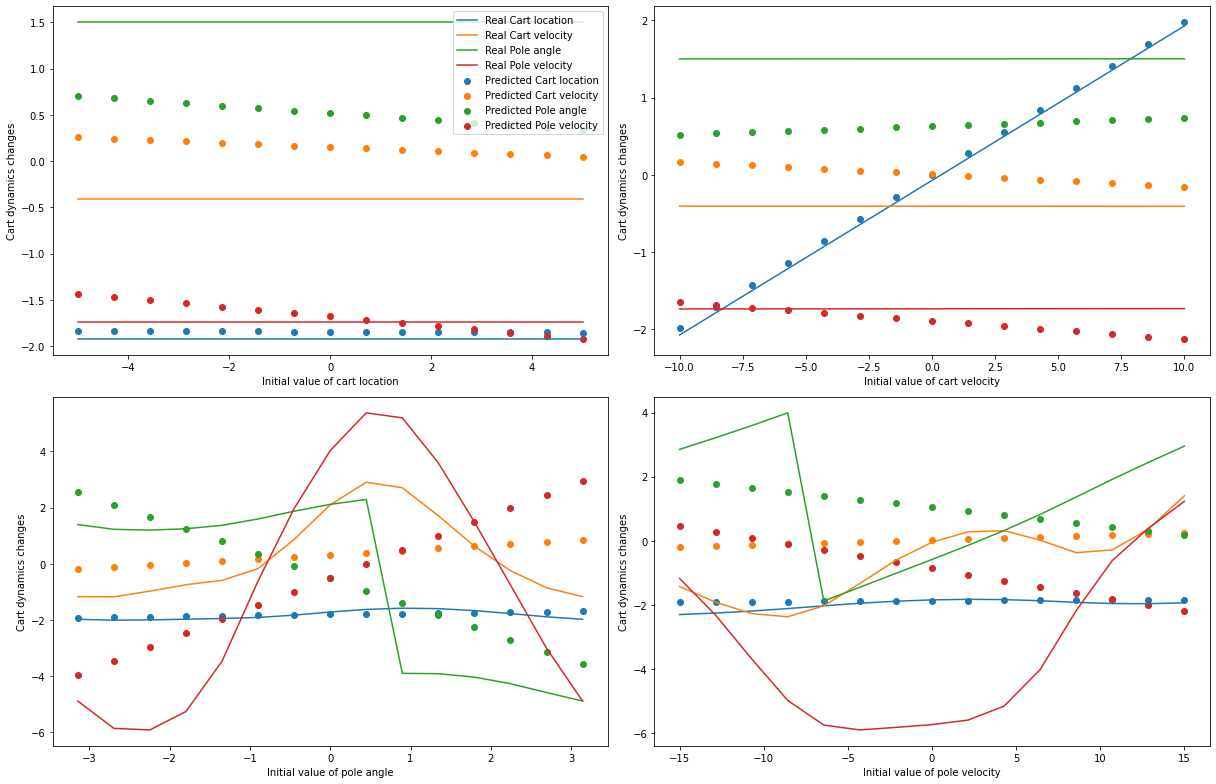

In [341]:
together_plot()


## Task 1.4

In [35]:
def future_predictions_from_predictions(initial_conditions, time_steps,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = np.matmul(final_pred[i],W)
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from predictions) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

    

In [36]:
#future_predictions_from_predictions([[10,5,2,6]],10,remap_angle=True)

In [37]:
#future_predictions_from_predictions([[0,0,np.pi,15]],10,remap_angle=True)

In [38]:
def future_predictions_from_real(initial_conditions, time_steps,remap_angle=True):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)

    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=remap_angle)
        pred = np.matmul(final_y[i],W)
        pred+=final_y[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted (from recent dynamics) vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

In [39]:
#future_predictions_from_real([[10,5,2,6]],10,remap_angle=True)


In [40]:
#future_predictions_from_real([[0,0,np.pi,15]],10,remap_angle=True)

### Here I will train the model on non-remapped angle to see the effect

In [41]:
def get_xy_pairs_2(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=False,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [42]:
x2,y2= get_xy_pairs_2(500)

In [43]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x2= x2[:cutoff]
test_x2=x2[cutoff:]

train_y2=y2[:cutoff]
test_y2=y2[cutoff:]


In [44]:
r,B = predict(train_x2, test_x2, train_y2)

In [45]:
print(B)

[[ 6.85606607e-04  1.59020731e-02  8.30766617e-04  2.05170886e-02]
 [ 1.99546781e-01 -6.40283379e-03 -5.63333422e-04 -7.28688112e-03]
 [ 4.07282341e-02  1.98941520e-01  1.61021142e-01  1.17140141e+00]
 [ 2.94630016e-03  2.02175196e-02  1.96367548e-01 -6.35480574e-02]]


In [46]:
np.linalg.eigvals(W)


array([-0.00753095+0.07481295j, -0.00753095-0.07481295j,
       -0.16693927+0.j        , -0.89923697+0.j        ])

In [47]:
np.linalg.eigvals(B)

array([ 0.54166431,  0.0477209 , -0.05313728, -0.44449207])

# Task 2

In [225]:
def kernel(x,x_dash,sigma):
    final_power=0
    for i in range(len(x)):
        if i!=2: power1 = (x[i]-x_dash[i])**2
        else: power1 = (np.sin((x[i]-x_dash[i])/2))**2
        power2=power1/2*(sigma[i])**2
        final_power+=power2

    K = np.exp(-final_power)
    return K
a = np.array([1,2,3,4])
b=np.array([3,4,5,6])
print(kernel(a,b,[0.1,0.1,0.2,0.2]))

0.8744488573757019


### Now we create the K matrix

In [570]:
def kernel_matrix(n,m,data):
    assert n == len(data),"n is {} and len data is {}".format(n,len(data))
    matrix = np.zeros((n,m))

    #generate indices of m basis centers
    m_indices =[]
    while len(m_indices)<m:
        add = int(np.random.uniform(0,n))
        if add in m_indices:
            continue
        else:
            m_indices.append(add)
    for i in range(n):
        for j in range(m): 
            matrix[i,j] = kernel(data[i],data[m_indices[j]],sigma)
    return matrix, m_indices

In [571]:
n=1000



x,y = get_xy_pairs(n)


In [572]:
# Get standard deviation for sigma
sigma = np.array(np.std(x,axis=0))*0.01
print(sigma)

[0.02943499 0.05726558 0.01822991 0.0870997 ]


In [618]:
knm10 = kernel_matrix(n,10,x)
knm20= kernel_matrix(n,20,x)
knm40= kernel_matrix(n,40,x)
knm80= kernel_matrix(n,80,x)
knm160= kernel_matrix(n,160,x)


### First we try without data error (ie without lambda)

In [574]:
def get_alpha_lstsq(kernel,y):
    alpha = np.array(np.linalg.lstsq(kernel[0],y[:,0],rcond=None)[0])
    for i in range(3):
        alpha = np.vstack((alpha,np.array(np.linalg.lstsq(kernel[0],y[:,i+1],rcond=None)[0])))
    return alpha

In [596]:
get_alpha_lstsq(knm20,y).shape

(4, 20)

### Now we try with lambda (essentially solve (Kmn*Knm +lambda*Kmm)alpha = Kmn*Y)

In [576]:
def get_alpha_with_lambda(kernel_mat,x,y,lambd,m):
    # get the Kmm matrix

    for value in kernel_mat[1]:
        try:
            data = np.vstack((data,np.array(x[value])))
        except:
            data = np.array(x[value])

    Kmm = kernel_matrix(m,m,data[:m])[0]

    #Set up least squares
    lhs = np.matmul(kernel_mat[0].T,kernel_mat[0]) + lambd*Kmm
    
    alpha = np.array(np.linalg.lstsq(lhs,np.matmul(kernel_mat[0].T,y[:,0]),rcond=None)[0])
    for i in range(3):
        rhs = np.matmul(kernel_mat[0].T,y[:,i+1])
        alpha = np.vstack((alpha,np.array(np.linalg.lstsq(lhs,rhs,rcond=None)[0])))

    return alpha


In [597]:
get_alpha_with_lambda(knm20,x,y,0.00001,20)[0]

array([ -27.30336707, -395.12734176,  170.39047855, -128.55973952,
        -60.00685454,   53.29107207, -136.48371935,  -49.12611178,
        200.97561625,  -75.51732406,   26.12895301,  -77.89125526,
        -37.15130928,  662.44745815,   68.71523155,   -2.76025269,
         58.53263065, -172.65184478, -114.33497493,   31.11198735])

In [600]:
def non_linear_model(initial_x,x,y,kernel_mat,lambd,m):
    pred = np.zeros((4))
    for variable in range(4):
        for count,value in enumerate(kernel_mat[1]):
            kern = kernel(initial_x,np.array(x[value]),sigma)
            
            #multiple = kern* get_alpha_with_lambda(kernel_mat,x,y,lambd,m)[variable][count]
            multiple=kern*get_alpha_lstsq(kernel_mat,y)[variable][count]
            
            pred[variable]+=multiple
    return pred


In [601]:
non_linear_model(np.array([10,10,np.pi,0]),x,y,knm80,0.0001,80)

array([1.9740658 , 1.88860361, 1.48181604, 3.02855226])

In [602]:
model.predict([[10,1,np.pi,2]])

array([[ 0.31005871,  0.35208945, -3.44339063,  2.83994671]])

In [603]:
np.matmul([10,1,np.pi,2],W)

array([ 0.30524566,  0.32153271, -3.5087746 ,  2.78247836])

In [604]:
#Create train and test sets
proportion = 0.95
number_of_samples = n
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]

In [622]:
def non_lin_prediction(test_x):    
    for item in test_x:
        try:
            non_linear_preds2 = np.vstack((non_linear_preds2,non_linear_model(item,x,y,knm160,0.0001,160)))
        except:
            non_linear_preds2 = np.array(non_linear_model(item,x,y,knm160,0.0001,160))
    return non_linear_preds2

(0.02626030017561014,
 0.3513649085927897,
 1.401754826315482,
 0.3538861732187342)

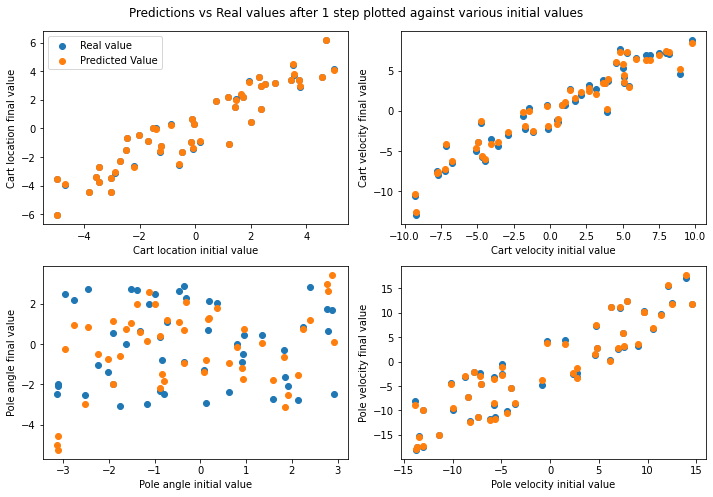

In [623]:
vertical_plot(test_x,test_y+test_x,non_lin_prediction(test_x)+test_x)
rmse_calc(test_y,non_lin_prediction(test_x))

## Task 2.1

In [624]:

def non_linear_one_step_difference_with_predictions(variable, x_axis_range, x_axis_intervals,m):
    initial = [-0.24,-9.27,-1.07,9.09]
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    pred = np.zeros((4))
    for i in x_axis:
        initial[variable] = i
        x_t = start_the_cart(initial, steps=steps, display_plots=False,remap_angle=True)
        real = x_t-initial
        pred = non_linear_model(initial,x,y,knm160,0.00001,m)
        try: 
            final_y = np.vstack((final_y, np.array(real)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(real)
            final_pred = np.array(pred)



    return x_axis,final_y,final_pred

In [625]:
x_axis1, c_l_real,c_l_pred = non_linear_one_step_difference_with_predictions(0,[-5,5],15,160)
print(c_l_pred.shape)

(15, 4)


In [626]:
def non_linear_together_plot():
    x_axis1, c_l_real,c_l_pred = non_linear_one_step_difference_with_predictions(0,[-5,5],15,160)
    x_axis2,c_v_real,c_v_pred = non_linear_one_step_difference_with_predictions(1,[-10,10],15,160)
    x_axis3,p_a_real,p_a_pred = non_linear_one_step_difference_with_predictions(2,[-np.pi,np.pi],15,160)
    x_axis4,p_v_real,p_v_pred = non_linear_one_step_difference_with_predictions(3,[-15,15],15,160)

    fig, axs = plt.subplots(2, 2, figsize=(17, 11))
    for i in range(4):
        axs[0,0].plot(x_axis1, [y[i] for y in c_l_real],label='Real {}'.format(variable_number[i]))
        axs[0,0].scatter(x_axis1, [y[i] for y in c_l_pred],label='Predicted {}'.format(variable_number[i]))
        
        
        
        axs[0,1].plot(x_axis2, [y[i] for y in c_v_real],label='Real c_v')
        axs[0,1].scatter(x_axis2, [y[i] for y in c_v_pred],label='Predicted c_v')

        axs[1,0].plot(x_axis3, [y[i] for y in p_a_real],label='Real p_a')
        axs[1,0].scatter(x_axis3, [y[i] for y in p_a_pred],label='Predicted p_a')
        
        axs[1,1].plot(x_axis4, [y[i] for y in p_v_real],label='Real p_v')
        axs[1,1].scatter(x_axis4, [y[i] for y in p_v_pred],label='Predicted p_v')

        
        axs[0,0].legend()


    axs[0,0].set_xlabel('Initial value of cart location')
    axs[0,0].set_ylabel('Cart dynamics changes')

    axs[0,1].set_xlabel('Initial value of cart velocity')
    axs[0,1].set_ylabel('Cart dynamics changes')

    axs[1,0].set_xlabel('Initial value of pole angle')
    axs[1,0].set_ylabel('Cart dynamics changes')

    axs[1,1].set_xlabel('Initial value of pole velocity')
    axs[1,1].set_ylabel('Cart dynamics changes')

    fig.tight_layout()
    
        
    plt.show()

In [627]:
print (initialize)

[-0.3559989  -8.28181693 -2.68246241  8.58430067]


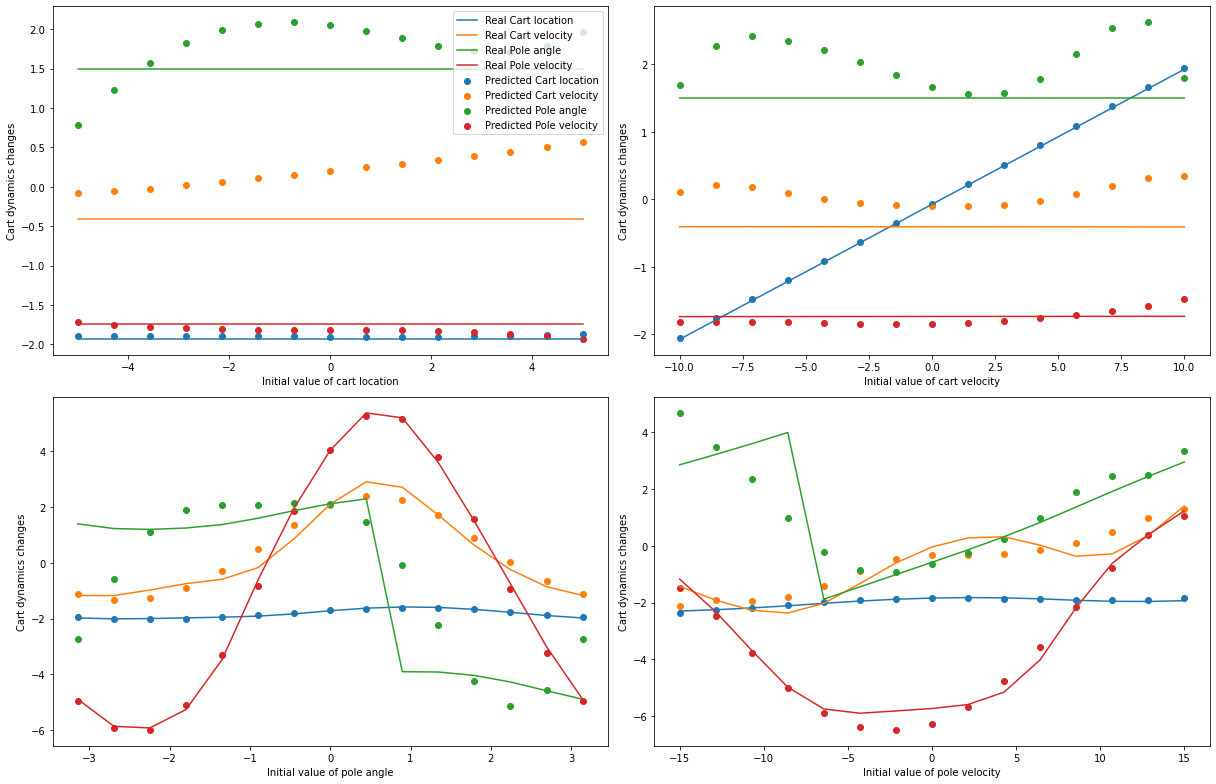

In [628]:
non_linear_together_plot()